### Importando as bibliotecas do projeto:

In [201]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta
from datetime import datetime


### CAMINHOS DOS ARQUIVOS:

In [202]:
# Caminhos dos arquivos Excel.
url_cargas_geral = r'C:\Users\coere\OneDrive\Área de Trabalho\Rafael\Projetos\Portifólio\GERAL - CARGAS.xlsx' # Caminho do relatório de cargas geral.
url_rotas = r'C:\Users\coere\OneDrive\Área de Trabalho\Rafael\Projetos\Portifólio\GERAL - ROTAS.xlsx' # Caminho do relatório de rotas geral.
data_inicial = '2025-01-01' # Data inicial da safra que estamos validando.
data_final = datetime.datetime.now() - datetime.timedelta(days=1) # Automatiza a data final para o dia anterior ao atual.

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

### ROTAS NÃO EXPORTADAS POR DISTRITO:

In [203]:
# Lendo o arquivo Excel e armazenando os dados em um DataFrame.
df_rotas_nao_exportadas = pd.read_excel(url_rotas, header=4)

In [204]:
# Convertendo a coluna de data para o formato datetime.
df_rotas_nao_exportadas["DATA"] = pd.to_datetime(df_rotas_nao_exportadas["DATA"], dayfirst=True, errors="coerce")

# Criando uma nova coluna 'DATA' com o formato desejado.
df_rotas_nao_exportadas['DISTRITO FILIAL 2'] = ""

In [205]:
# Convertendo a coluna 'DISTRITO FILIAL' para string.
df_rotas_nao_exportadas['DISTRITO FILIAL'] = df_rotas_nao_exportadas['DISTRITO FILIAL'].str.strip()
# Convertendo a coluna 'DISTRITO FILIAL 2' para string.
df_rotas_nao_exportadas['DISTRITO FILIAL 2'] = df_rotas_nao_exportadas['DISTRITO FILIAL 2'].str.strip()

# Filtra apenas linhas com 'ID Visita Recorrente' vazio.
df_filtrado = df_rotas_nao_exportadas[df_rotas_nao_exportadas['ID Visita Recorrente'].isnull()]

# Agrupa por DISTRITO FILIAL e pega a menor DATA (mais antiga).
datas_mais_antigas = (
    df_filtrado
    .groupby('DISTRITO FILIAL', 
        as_index=False)['DATA']
        .min()
        .rename(columns={'DATA': 'NÃO_EXPORTADA'})
        .sort_values(by='NÃO_EXPORTADA')
)

In [206]:
# Criando uma lista de distritos para o merge.
# A lista de distritos deve conter os nomes exatos que estão na coluna 'DISTRITO FILIAL' do DataFrame original.
distritos = [
    "PALOTINA-SOJA", "SANTA ROSA-SOJA", "PATO BRANCO-SOJA",
    "LAGOA VERMELHA-SOJA", "CASCAVEL-SOJA", "IJUI-SOJA",
    "CHAPECO-SOJA", "MARINGA-SOJA", "RIO DO SUL-SOJA",
    "LONDRINA-SOJA", "JATAI-SOJA", "GUARAPUAVA-SOJA",
    "CANOINHAS-SOJA", "CORNELIO PROCOP-SOJA", "PONTA GROSSA-SOJA",
    "JULIO DE CASTILHOS-SOJA", "SARANDI-SOJA", "CARAZINHO-SOJA",
    "IBIRUBA-SOJA", "SANTO ANGELO-SOJA", "CRUZ ALTA-SOJA",
    "PORTO ALEGRE-SOJA", "SAO GABRIEL-SOJA", "PASSO FUNDO-SOJA"
]

# Criando um DataFrame com os distritos.
# A coluna 'DISTRITO FILIAL 2' é criada para armazenar os distritos.
df_rotas_nao_exportadas2 = pd.DataFrame({'DISTRITO FILIAL 2': distritos})

# Faz o merge (união) com o DataFrame datas_mais_antigas.
df_rotas_nao_exportadas3 = df_rotas_nao_exportadas2.merge(
    datas_mais_antigas,
    left_on='DISTRITO FILIAL 2',
    right_on='DISTRITO FILIAL',
    how='left'
)

# Preenche datas faltantes com data de hoje.
df_rotas_nao_exportadas3['NÃO_EXPORTADA'] = df_rotas_nao_exportadas3['NÃO_EXPORTADA'].fillna(datetime.today().strftime('%Y-%m-%d'))

# Se quiser, elimina a coluna 'DISTRITO FILIAL' que veio do merge
df_rotas_nao_exportadas4 = df_rotas_nao_exportadas3.drop(columns=['DISTRITO FILIAL'])

# Resultado final.
df_rotas_nao_exportadas4.sort_values(by='NÃO_EXPORTADA')

,DISTRITO FILIAL 2,NÃO_EXPORTADA
18,IBIRUBA-SOJA,2025-03-27
23,PASSO FUNDO-SOJA,2025-04-09
14,PONTA GROSSA-SOJA,2025-04-11
3,LAGOA VERMELHA-SOJA,2025-04-18
5,IJUI-SOJA,2025-04-23
21,PORTO ALEGRE-SOJA,2025-04-25
6,CHAPECO-SOJA,2025-04-25
19,SANTO ANGELO-SOJA,2025-04-26
8,RIO DO SUL-SOJA,2025-04-27
12,CANOINHAS-SOJA,2025-04-28


In [207]:
# Renomeia a coluna 'NÃO EXPORTADA' para 'FINAL'
df_rotas_nao_exportadas4 = df_rotas_nao_exportadas4.rename(columns={
    'DISTRITO FILIAL 2': 'DISTRITO FILIAL',
    'NÃO_EXPORTADA': 'FINAL'
})


In [208]:
# Salva em Excel
df_rotas_nao_exportadas4.to_excel("ROTAS NÃO EXPORTADAS.xlsx", index=False)

### ROTAS NÃO EXPORTADAS POR REGIONAL:

In [209]:
# Filtrando os dados de cargas por:
# 1. Data inicial e final.
# 2. Regional Filial igual a BPRSC.
# 3. ID Visita Recorrente nulo.
df_rotas_filtered = df_rotas_nao_exportadas[
    (df_rotas_nao_exportadas['REGIONAL FILIAL'] == 'BPRSC') &
    (df_rotas_nao_exportadas['ID Visita Recorrente'].isnull()) &
    (df_rotas_nao_exportadas['DATA'].between(data_inicial, data_final))
]

# Agrupando os dados filtrados por DISTRITO FILIAL e contando o número de ocorrências.
bprsc = df_rotas_filtered.groupby('DISTRITO FILIAL').size().reset_index(name='Total')

In [210]:
# Salvando em Excel.
df_rotas_filtered.to_excel("ROTAS NÃO EXPORTADAS - BPRSC.xlsx", index=False)

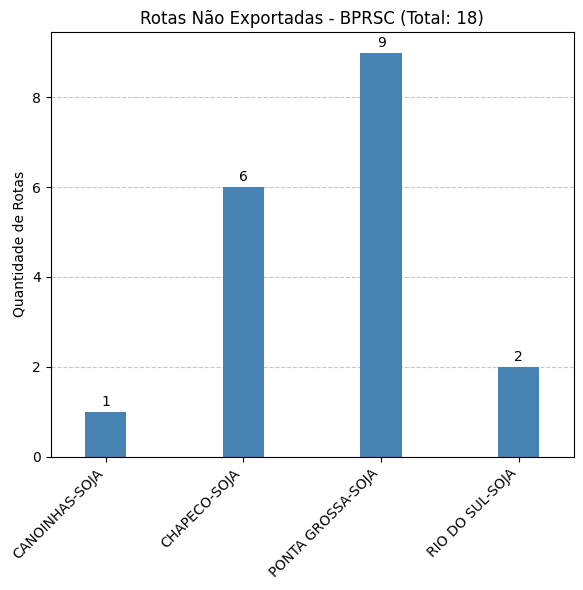

In [211]:
# Criando o gráfico de barras.
ax = bprsc.plot(
    x='DISTRITO FILIAL',
    y='Total',
    kind='bar',
    color='steelblue',
    figsize=(6, 6),
    legend=False,
    title=f"Rotas Não Exportadas - BPRSC (Total: {bprsc['Total'].sum()})",
    width=0.3  # aqui ajusta a largura da barra
)

# Melhorias
ax.set_xlabel("")  # Tira o label do eixo X (opcional)
ax.set_ylabel("Quantidade de Rotas")  # Nome para o eixo Y
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Grid suave só no Y
ax.set_axisbelow(True)  # Deixa o grid por trás das barras
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos

# Adicionar rótulos em cima das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.tight_layout()
plt.show()

In [212]:
bprsc

,DISTRITO FILIAL,Total
0,CANOINHAS-SOJA,1
1,CHAPECO-SOJA,6
2,PONTA GROSSA-SOJA,9
3,RIO DO SUL-SOJA,2


In [213]:
# Filter for Regional BRSSO and empty 'ID Visita Recorrente'
df_rotas_filtered2 = df_rotas_nao_exportadas[
    (df_rotas_nao_exportadas['REGIONAL FILIAL'] == 'BRSSO') &
    (df_rotas_nao_exportadas['ID Visita Recorrente'].isnull()) &
    (df_rotas_nao_exportadas['DATA'].between(data_inicial, data_final))
]

# Group by 'DISTRITO FILIAL' and get the count
brsso = df_rotas_filtered2.groupby('DISTRITO FILIAL').size().reset_index(name='Total')

In [214]:
# Salvando em Excel
df_rotas_filtered2.to_excel("ROTAS NÃO EXPORTADAS - BRSSO.xlsx", index=False)

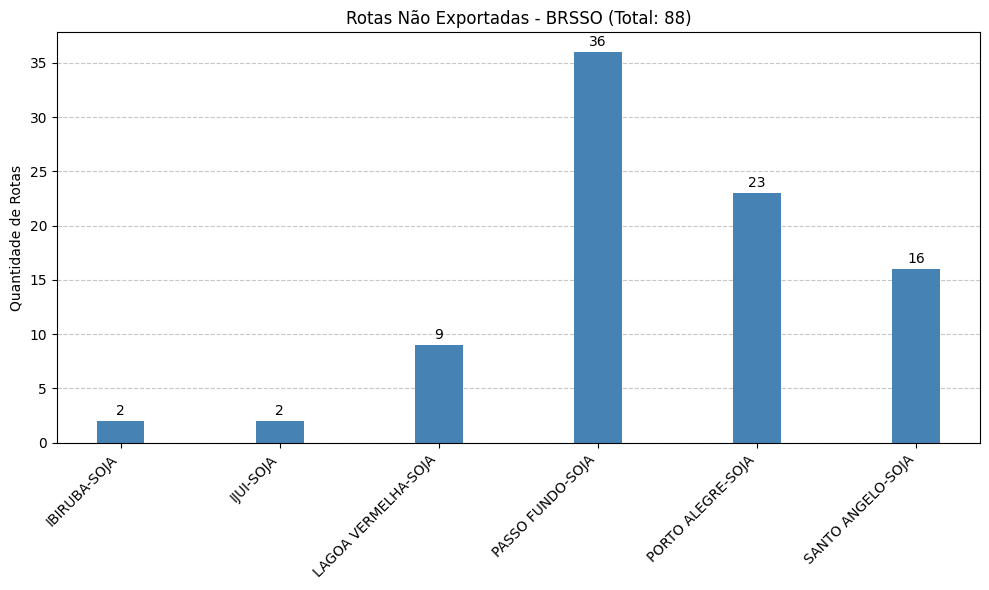

In [215]:
# Plot
ax = brsso.plot(
    x='DISTRITO FILIAL',
    y='Total',
    kind='bar',
    color='steelblue',
    figsize=(10, 6),
    legend=False,
    title=f"Rotas Não Exportadas - BRSSO (Total: {brsso['Total'].sum()})",
    width=0.3  # aqui ajusta a largura da barra
)

# Melhorias
ax.set_xlabel("")  # Tira o label do eixo X (opcional)
ax.set_ylabel("Quantidade de Rotas")  # Nome para o eixo Y
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Grid suave só no Y
ax.set_axisbelow(True)  # Deixa o grid por trás das barras
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos

# Adicionar rótulos em cima das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=2)

plt.tight_layout()
plt.show()

In [216]:
brsso

,DISTRITO FILIAL,Total
0,IBIRUBA-SOJA,2
1,IJUI-SOJA,2
2,LAGOA VERMELHA-SOJA,9
3,PASSO FUNDO-SOJA,36
4,PORTO ALEGRE-SOJA,23
5,SANTO ANGELO-SOJA,16


In [217]:
# Filter for rows where 'ID Visita Recorrente' is empty
df_filtered = df_rotas_nao_exportadas[
    (df_rotas_nao_exportadas['REGIONAL FILIAL'] == 'BPRSC') &
    (df_rotas_nao_exportadas['ID Visita Recorrente'].isnull()) &
    (df_rotas_nao_exportadas['DATA'].between('2025-01-01', '2025-04-27'))
    ]

# Group by 'DISTRITO FILIAL' and get the IDs
ids_bprsc = df_filtered.groupby('DISTRITO FILIAL')['ID'].apply(list).reset_index()

ids_bprsc


,DISTRITO FILIAL,ID
0,CHAPECO-SOJA,"[16872, 16872, 17383]"
1,PONTA GROSSA-SOJA,"[15149, 15149, 16854, 16854, 17481, 17481, 174..."
2,RIO DO SUL-SOJA,[17470]


In [218]:
# Filter for rows where 'ID Visita Recorrente' is empty
df_filtered_brsso = df_rotas_nao_exportadas[
    (df_rotas_nao_exportadas['REGIONAL FILIAL'] == 'BRSSO') &
    (df_rotas_nao_exportadas['ID Visita Recorrente'].isnull()) &
    (df_rotas_nao_exportadas['DATA'].between('2025-01-01', '2025-04-27'))
    ]

# Group by 'DISTRITO FILIAL' and get the IDs
ids_brsso = df_filtered_brsso.groupby('DISTRITO FILIAL')['ID'].apply(list).reset_index()

ids_brsso

,DISTRITO FILIAL,ID
0,IBIRUBA-SOJA,"[13840, 14470]"
1,IJUI-SOJA,"[17109, 17109]"
2,LAGOA VERMELHA-SOJA,"[16745, 17131, 17131, 17138, 17143, 17145]"
3,PASSO FUNDO-SOJA,"[15887, 15887, 15887, 15887, 15937, 16560, 165..."
4,PORTO ALEGRE-SOJA,"[17326, 17352, 17660, 17663, 17692]"
5,SANTO ANGELO-SOJA,"[16964, 17512, 17519, 17521, 17524, 17526, 175..."


In [219]:
# Save the DataFrame to an Excel file
ids_brsso.to_excel('ID ROTAS NÃO EXPORTADAS BRSSO.xlsx', index=False)
ids_bprsc.to_excel('ID ROTAS NÃO EXPORTADAS BPRSC.xlsx', index=False)

### ÚLTIMA VALIDAÇÃO:

In [220]:
# Criando a base para um DataFrame com as datas personalizadas para cada distrito.
datas_personalizadas = {
    "CHAPECO-SOJA": "2025-04-23",
    "PONTA GROSSA-SOJA": "2025-04-24",
    "GUARAPUAVA-SOJA": "2025-04-27",
    "JULIO DE CASTILHOS-SOJA": "2025-04-28",
    "IBIRUBA-SOJA": "2025-04-24",
    "RIO DO SUL-SOJA": "2025-04-26",
    "SAO GABRIEL-SOJA": "2025-04-27",
    "CRUZ ALTA-SOJA": "2025-04-26",
    "SARANDI-SOJA": "2025-04-19",
    "CORNELIO PROCOP-SOJA": "2025-04-19",
    "PORTO ALEGRE-SOJA": "2025-04-24",
    "LAGOA VERMELHA-SOJA": "2025-04-17",
    "SANTO ANGELO-SOJA": "2025-04-25",
    "SANTA ROSA-SOJA": "2025-04-24",
    "CANOINHAS-SOJA": "2025-04-24",
    "CARAZINHO-SOJA": "2025-04-28",
    "IJUI-SOJA": "2025-04-22",
    "PATO BRANCO-SOJA": "2025-04-21",
    "CASCAVEL-SOJA": "2025-03-13",
    "JATAI-SOJA": "2025-03-30",
    "LONDRINA-SOJA": "2025-04-05",
    "MARINGA-SOJA": "2025-04-05",
    "PALOTINA-SOJA": "2025-03-02"
}
# Criando o DataFrame com as datas personalizadas.
df_distritos = pd.DataFrame([
    {
        'DISTRITO FILIAL': distrito,
        'ATÉ': pd.to_datetime(data)
    }
    for distrito, data in datas_personalizadas.items()
])

In [221]:
# Chamando o DataFrame com as datas personalizadas.
df_distritos

,DISTRITO FILIAL,ATÉ
0,CHAPECO-SOJA,2025-04-23
1,PONTA GROSSA-SOJA,2025-04-24
2,GUARAPUAVA-SOJA,2025-04-27
3,JULIO DE CASTILHOS-SOJA,2025-04-28
4,IBIRUBA-SOJA,2025-04-24
5,RIO DO SUL-SOJA,2025-04-26
6,SAO GABRIEL-SOJA,2025-04-27
7,CRUZ ALTA-SOJA,2025-04-26
8,SARANDI-SOJA,2025-04-19
9,CORNELIO PROCOP-SOJA,2025-04-19


In [222]:
# Sortando o DataFrame pela coluna 'ATÉ' em ordem crescente.
df_distritos_sorted = df_distritos.sort_values(by='ATÉ')

# Salvando o DataFrame ordenado em um arquivo Excel.
df_distritos_sorted.to_excel("ÚLTIMAS VALIDAÇÕES.xlsx", index=False)

### CARGAS A VALIDAR

In [223]:
# Criando o DataFrame através do relatório em excel.
df_total_de_cargas = pd.read_excel(r"C:\Users\coere\OneDrive\Área de Trabalho\Rafael\Projetos\Portifólio\GERAL - CARGAS.xlsx", header=1)

In [224]:
# Convertendo a coluna de data para datetime.
df_total_de_cargas["DATA"] = pd.to_datetime(df_total_de_cargas["DATA"], dayfirst=True, errors="coerce")

In [225]:
# Padroniza os nomes dos distritos.
df_total_de_cargas['DISTRITO FILIAL'] = df_total_de_cargas['DISTRITO FILIAL'].str.strip()

In [226]:
# prompt: USAR O df_total_de_cargas FILTRANDO PELA COLUNA DISTRITO FILIAL E CONTANDO A QUANTIDADE DE LINHAS

# Group by 'DISTRITO FILIAL' and count the number of rows in each group
distrito_counts = df_total_de_cargas.groupby('DISTRITO FILIAL').size().reset_index(name='COUNT')

In [227]:
# Junta os dois dataframes por 'DISTRITO FILIAL'
df_datas_unificadas = pd.merge(
    df_distritos,
    df_rotas_nao_exportadas4,
    on='DISTRITO FILIAL'   # coluna do primeiro dataframe
    )

In [228]:
# df_distritos
# df_rotas_nao_exportadas3
df_datas_unificadas

,DISTRITO FILIAL,ATÉ,FINAL
0,CHAPECO-SOJA,2025-04-23,2025-04-25
1,PONTA GROSSA-SOJA,2025-04-24,2025-04-11
2,GUARAPUAVA-SOJA,2025-04-27,2025-04-29
3,JULIO DE CASTILHOS-SOJA,2025-04-28,2025-04-29
4,IBIRUBA-SOJA,2025-04-24,2025-03-27
5,RIO DO SUL-SOJA,2025-04-26,2025-04-27
6,SAO GABRIEL-SOJA,2025-04-27,2025-04-29
7,CRUZ ALTA-SOJA,2025-04-26,2025-04-29
8,SARANDI-SOJA,2025-04-19,2025-04-29
9,CORNELIO PROCOP-SOJA,2025-04-19,2025-04-29


In [229]:
# # Iterate through each row in df_datas_unificadas
for index, row in df_datas_unificadas.iterrows():
    distrito = row['DISTRITO FILIAL']
    data_inicial = row['ATÉ'] + pd.Timedelta(days=1)
    data_final = row['FINAL'] - pd.Timedelta(days=1)

    # Filter df_total_de_cargas based on distrito, data_inicial, and data_final
    cargas_filtradas = df_total_de_cargas[
        (df_total_de_cargas['DISTRITO FILIAL'] == distrito) &
        (df_total_de_cargas['DATA'] >= data_inicial) &
        (df_total_de_cargas['DATA'] <= data_final)
    ]

    # Get the number of rows in the filtered DataFrame
    quantidade_linhas = len(cargas_filtradas)

    # Update the 'CARGAS P VALIDAR' column in df_datas_unificadas
    df_datas_unificadas.loc[index, 'CARGAS P VALIDAR'] = quantidade_linhas


In [230]:
# Remove rows where 'CARGAS P VALIDAR' is zero
df_datas_unificadas = df_datas_unificadas[df_datas_unificadas['CARGAS P VALIDAR'] != 0]

In [231]:
# Converte a coluna 'CARGAS P VALIDAR' para inteiros
df_datas_unificadas['CARGAS P VALIDAR'] = df_datas_unificadas['CARGAS P VALIDAR'].astype(int)

# Ordena a coluna 'CARGAS P VALIDAR' em ordem decrescente
df_datas_unificadas = df_datas_unificadas.sort_values(by='CARGAS P VALIDAR', ascending=False)

C:\Users\coere\AppData\Local\Temp\ipykernel_14992\659133896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_datas_unificadas['CARGAS P VALIDAR'] = df_datas_unificadas['CARGAS P VALIDAR'].astype(int)


In [232]:
df_datas_unificadas

,DISTRITO FILIAL,ATÉ,FINAL,CARGAS P VALIDAR
14,CANOINHAS-SOJA,2025-04-24,2025-04-28,128
0,CHAPECO-SOJA,2025-04-23,2025-04-25,55
17,PATO BRANCO-SOJA,2025-04-21,2025-04-29,33
6,SAO GABRIEL-SOJA,2025-04-27,2025-04-29,9
2,GUARAPUAVA-SOJA,2025-04-27,2025-04-29,4
22,PALOTINA-SOJA,2025-03-02,2025-04-29,4


In [233]:
# Assuming df_datas_unificadas2 is defined in the previous code cell
df_datas_unificadas.to_excel("CARGAS PARA VALIDAR.xlsx", index=False)